<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_4/les4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

from google.colab import files
%matplotlib inline

In [74]:
# Завантаження даних
X, y = load_iris(return_X_y=True)

# Навчання моделі
clf = LogisticRegression(random_state=0, max_iter=200).fit(X, y)

# Оцінка точності
print("Accuracy:", clf.score(X, y))


Accuracy: 0.9733333333333334


In [75]:
X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]
])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

In [76]:

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=0)

clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)

clf.predict(X_test[:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

---
# Logistic regression
---

In [77]:
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :2].values  # Вибираємо колонки "Exam1" і "Exam2"
    y = data.iloc[:, 2].values    # Вибираємо колонку "Admission"
    return X, y


In [78]:
def plot_data(X, y, pos_label='y=1', neg_label='y=0'):
    # Логічні маски
    positive = y == 1
    negative = y == 0

    # Побудова графіка
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


In [79]:
# Завантаження файлу
uploaded = files.upload()

# Завантаження даних
X_train, y_train = load_data('admission_data.csv')

Saving admission_data.csv to admission_data (1).csv


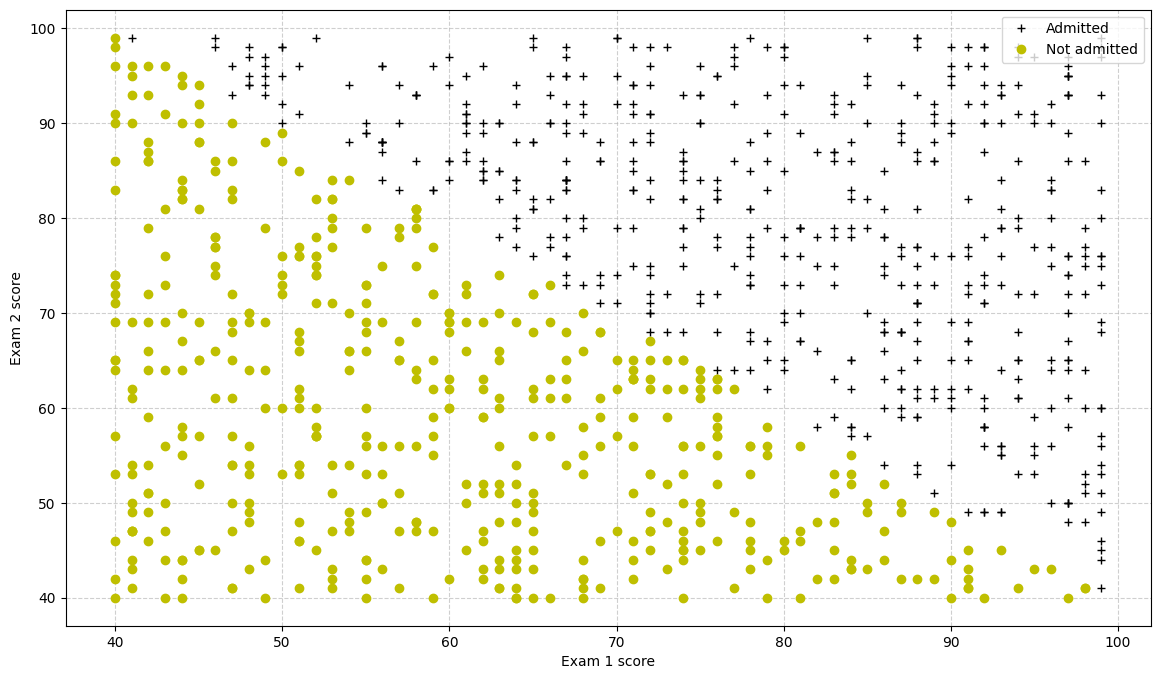

In [80]:
# Побудова графіка
plt.figure(figsize=(14, 8))
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)  # Додаємо сітку
plt.show()

---
# Microcip test
---

In [81]:
uploaded = files.upload()
# Завантаження даних
raw_X, y = load_data('chip_test_results.csv')

Saving chip_test_results.csv to chip_test_results (1).csv


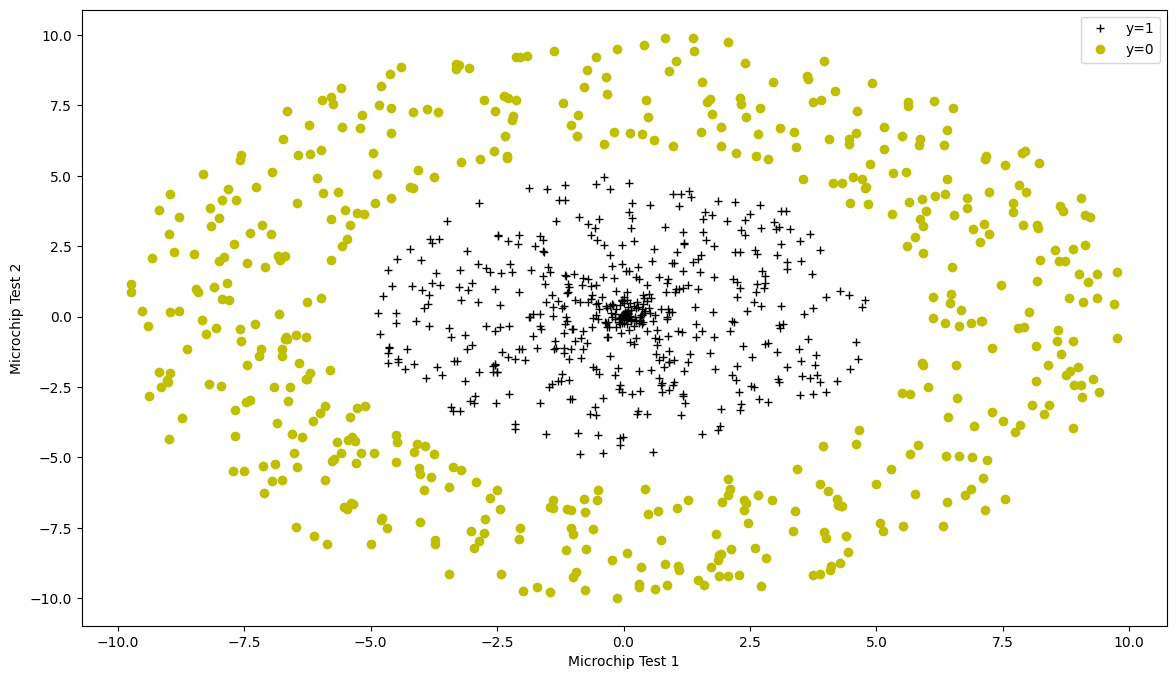

In [82]:
# Plot examples
plt.figure(figsize=(14, 8))
plot_data(raw_X, y)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.show()

---
# Overfitting / Underfitting (Variance / Bias)
---

In [83]:
def map_feature(x1, x2, degree):

  x1 = x1.reshape((x1.size, 1))
  x2 = x2.reshape((x2.size, 1))

  result = np.ones(x1[:, 0].shape)

  for i in range(1, degree + 1):
    for j in range(0, i + 1):
      result = np.c_[result, (x1**(i-j))*(x2**j)]

  return result


In [84]:
X = map_feature(raw_X[:, 0], raw_X[:, 1], 3)

In [85]:
X.shape

(1000, 10)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [87]:
model = LogisticRegression(penalty=None, fit_intercept=False)

In [88]:
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, penalty=None)

In [89]:
# function by lector, but dont work for -> cs.collections...


# def plot_decision_boundary(weights, X, y, degree):

#   u = np.linspace(-1, 1.5, 50)
#   v = np.linspace(-1, 1.5, 50)

#   decision_boundary = np.zeros((u.size, v.size))

#   # Evaluate z = theta*x over the grid
#   for i in range(0, u.size):
#     for j in range(0, v.size):
#       decision_boundary[i, j] = np.dot(map_feature(u[i], v[j], degree), weights)

#   decision_boundary = decision_boundary.T

#   # Plot the contour and the data examples
#   # plot z = 0
#   # Notice you need to specify the range [0, 0]

#   cs = plt.contour(u, v, decision_boundary, levels=[0], linewidths=2, colors='r')
#   cs.collections[0].set_label('Decision Boundary')

#   plt.legend(loc='upper right')
#   plt.title(f'Decision Boundary (Degree={degree})')
#   plot_data(X, y)
#   plt.xlabel('Microchip Test 1')
#   plt.ylabel('Microchip Test 2')
#   plt.show()

In [90]:
def plot_decision_boundary(weights, X, y, degree):
    """
    Візуалізує границю рішень для логістичної регресії з поліноміальними ознаками.

    Параметри:
    weights (numpy.ndarray): Ваги моделі (model.coef_[0]).
    X (numpy.ndarray): Вхідні дані (ознаки).
    y (numpy.ndarray): Мітки класів.
    degree (int): Ступінь полінома для map_feature.
    """
    # Визначення меж для осей
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Створення сітки точок для побудови границі
    u = np.linspace(x_min, x_max, 500)
    v = np.linspace(y_min, y_max, 500)
    U, V = np.meshgrid(u, v)

    # Відображення точок сітки через map_feature
    grid_points = map_feature(U.ravel(), V.ravel(), degree)

    # Прогнозування класів для кожної точки сітки
    Z = np.dot(grid_points, weights)
    Z = Z.reshape(U.shape)

    # Побудова графіка
    plt.figure(figsize=(10, 6))
    plot_data(X, y)  # Відображення початкових даних

    # Додаємо контур границі рішень
    plt.contour(U, V, Z, levels=[0], colors='r', linewidths=2)
    plt.plot([], [], color='r', label="Decision Boundary")  # Легенда для границі

    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(loc='upper right')
    plt.title(f'Decision Boundary (Degree={degree})')
    plt.show()

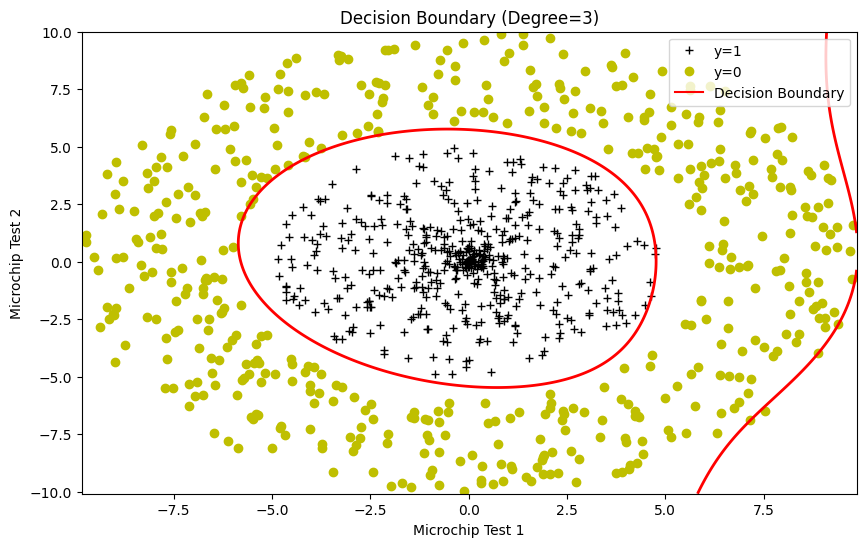

In [91]:
plot_decision_boundary(model.coef_[0], raw_X, y, degree=3)

In [92]:
model.score(X_test, y_test)

0.995

# 6 degree

In [93]:
DEGREE = 6

In [94]:
Q = map_feature(raw_X[:, 0], raw_X[:, 1], DEGREE)

model = LogisticRegression(penalty=None, fit_intercept=False, max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=5000, penalty=None)

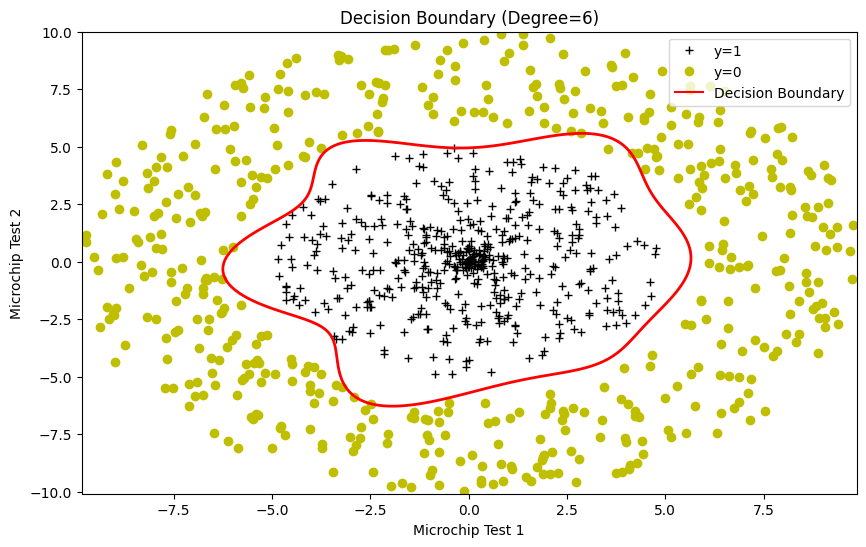

In [95]:
plot_decision_boundary(model.coef_[0], raw_X, y, DEGREE)

In [96]:
model.score(X_test, y_test)

0.9975

---
# Regularization
---

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
DEGREE = 6

In [99]:
Q = map_feature(raw_X[:, 0], raw_X[:, 1], DEGREE)

model = LogisticRegression(penalty='l2', fit_intercept=False, max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5)

In [100]:
scores

array([0.98333333, 1.        , 1.        , 0.99166667, 0.99166667])

In [101]:
scores.mean()

0.9933333333333334

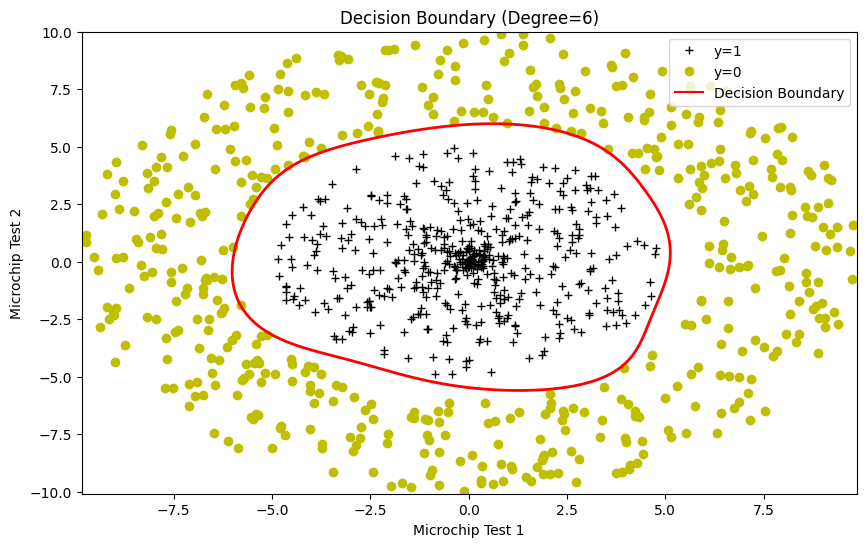

In [102]:
plot_decision_boundary(model.coef_[0], raw_X, y, DEGREE)

In [103]:
model.score(X_test, y_test)

0.9975

In [104]:
model.coef_

array([[ 2.87017419e+00,  4.59469545e-02,  1.17250488e-01,
         5.56065720e-01, -4.06903309e-02,  5.49413725e-01,
        -5.56723222e-02, -4.22741332e-03, -2.90156825e-03,
         2.81641112e-02,  3.86883741e-01, -1.23320387e-02,
         1.65745959e-01, -3.16652032e-02,  4.07291675e-01,
        -1.07038096e-02,  1.47931306e-03, -1.03848168e-02,
         2.24596329e-03,  2.32931249e-02,  5.93068464e-03,
        -1.32803503e-02,  2.31598754e-03, -1.80202528e-02,
        -3.64037395e-03, -1.74311442e-02, -3.07474689e-04,
        -1.30585963e-02]])

In [106]:

model = LogisticRegression(penalty='l2', solver='saga', fit_intercept=False, max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.59166667, 0.625     , 0.58333333, 0.58333333, 0.61666667])

In [107]:
scores.mean()

0.6000000000000001

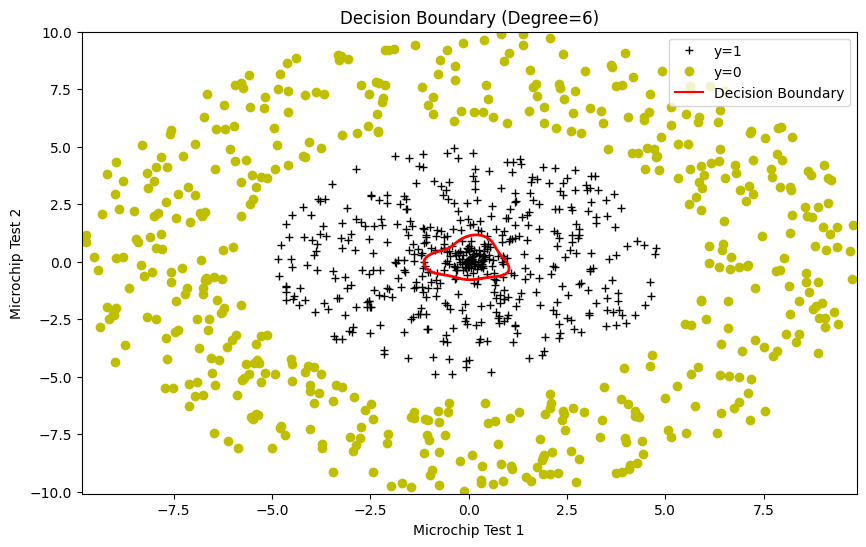

In [108]:
plot_decision_boundary(model.coef_[0], raw_X, y, DEGREE)

In [109]:
model.score(X_test, y_test)

0.605

In [110]:
model.coef_

array([[ 9.81811943e-07,  2.33208495e-09,  9.43891600e-08,
         3.96996161e-06,  2.43953612e-07,  3.76051553e-06,
        -4.77611279e-07, -5.77764546e-07,  1.49870393e-06,
         1.29454156e-06,  3.22149686e-05,  8.33804358e-07,
         7.80144452e-06,  3.42314375e-06,  2.65698983e-05,
        -6.51382651e-06, -2.13203524e-05,  1.77878300e-05,
         2.58182248e-06,  1.75468507e-05,  1.39000745e-05,
        -3.37896864e-05, -1.37506044e-05, -7.04173819e-05,
         2.89083266e-07, -1.09513071e-04,  1.37272906e-05,
        -3.71975275e-05]])

In [115]:
model = LogisticRegression(penalty='elasticnet', solver='saga', fit_intercept=False, max_iter = 5000, l1_ratio=0.7)

X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.59166667, 0.625     , 0.58333333, 0.58333333, 0.61666667])

In [116]:
model.coef_

array([[ 9.70939551e-07,  0.00000000e+00,  8.87893661e-08,
         3.94088521e-06,  2.37236587e-07,  3.73089751e-06,
        -4.77661938e-07, -5.65800548e-07,  1.48366869e-06,
         1.27865141e-06,  3.20020200e-05,  8.07932426e-07,
         7.75411888e-06,  3.40000997e-06,  2.63346075e-05,
        -6.46005110e-06, -2.09538982e-05,  1.76729780e-05,
         2.73730119e-06,  1.75309260e-05,  1.40026059e-05,
        -3.37742816e-05, -1.37216887e-05, -7.05368183e-05,
         4.05903612e-07, -1.09433398e-04,  1.36363381e-05,
        -3.71913460e-05]])

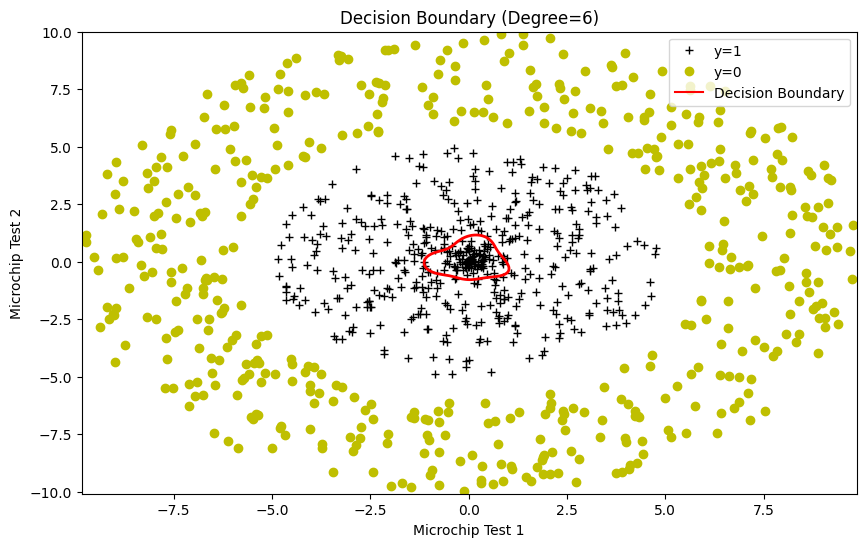

In [114]:
plot_decision_boundary(model.coef_[0], raw_X, y, DEGREE)

In [117]:
model.score(X_test, y_test)

0.6025

In [122]:
model = LogisticRegression(penalty='l2', fit_intercept=False, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(fit_intercept=False, max_iter=1000)

In [123]:
model.score(X_test, y_test)

0.9975

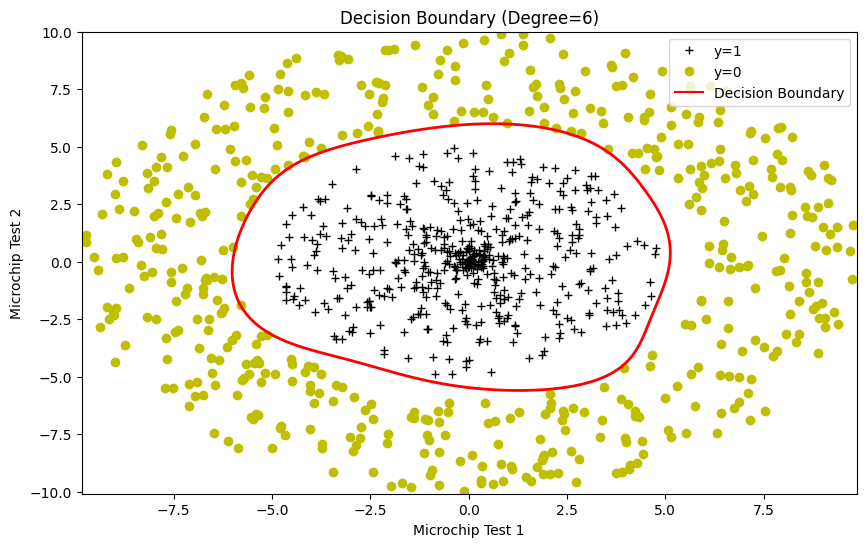

In [124]:
plot_decision_boundary(model.coef_[0], raw_X, y, DEGREE)